# Algoritmo Genético Básico

In [2]:
# import import_ipynb
# from algoritmos import *
from ipynb.fs.full.algoritmos import *

## Generación de semillas aleatorias

In [3]:
semilla = random.randint(0,9999999)

## Fichero ch130

geneticoBasico

Fichero: ch130
Tiempo de ejecución: 3604.041501

-------- PARÁMETROS A. GENÉTICO ---------
Sembrar greedy:	 True
Tam población:	 50
k_torneo:	 25
Tam cruce:	 124
Prob mutación:	 0.02
Tam mutación:	 10
------------------------------------------
Mejor sol Coste: 7579 	 #It: 85 	 Semilla: 7253923
-----
Coste Media:	30684.960000
-----
Coste Mejor:	7579.000000


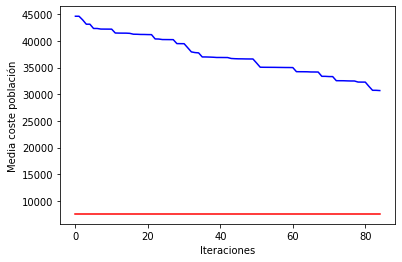

<Figure size 864x864 with 0 Axes>

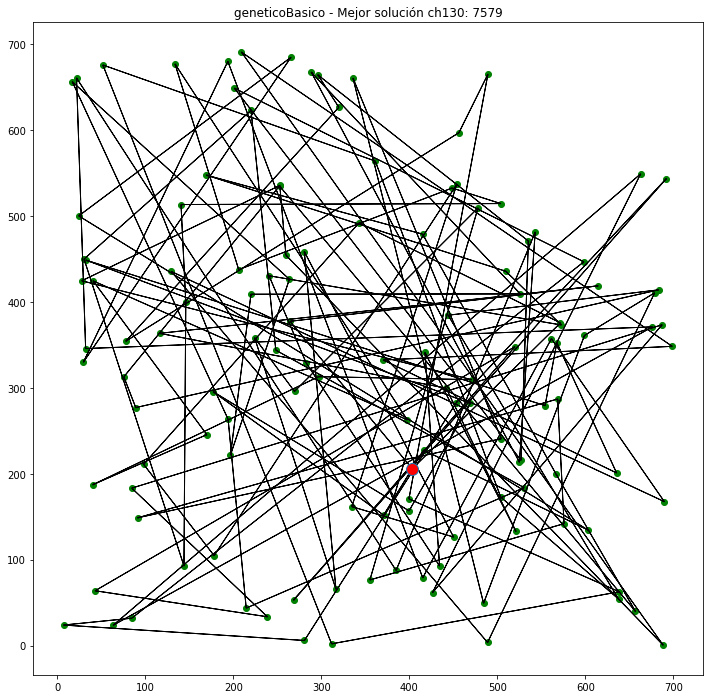

In [5]:
%matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(12,12)) 
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Media coste población')


algoritmo = "geneticoBasico"
print(algoritmo)
fichero = "ch130"
nodos = leeFichero(fichero)
distancias = getMDistancias(nodos)
    
print(f"\nFichero: {fichero}")

costes = []
it = []
mejorSolucion = []
mejorCoste = float('inf')

# Parámetros del algoritmo
num_nodos = len(nodos)    # Fichero
tam_poblacion = 50 # 30-100 individuos
k_torneo = round(0.5 * tam_poblacion) # Torneo selección, escogiendo k individuos aleatorios Presión/diversidad
tam_cruce = round(num_nodos * 0.95) # Num nodos a mantener del padre1 (Se mantiene mas del padre para no crear soluciones disruptivas)
prob_mutacion = 0.02 # Probabilidad de aplicar operador de mutación al hijo
tam_mutacion = round(num_nodos * 0.08) # Tamaño (num nodos) sublista a mutar 
sembrar_greedy = True # Plantar individuo solución algoritmo greedy
#########################

t = time.time()
with Pool(processes=8) as p:
       resultados = p.starmap(genetico_basico, product([semilla], [num_nodos], [distancias], [tam_poblacion], [k_torneo], [tam_cruce], [prob_mutacion], [tam_mutacion], [sembrar_greedy], [fig], [ax]))[0]

# resultados = genetico_basico(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion,  sembrar_greedy, fig, ax)
    
elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )

poblacion = resultados[0]
mejorIndividuo = min(poblacion.individuos)
mejorSolucion = mejorIndividuo.camino
coste = mejorIndividuo.coste

print("-------- PARÁMETROS A. GENÉTICO ---------")
print("Sembrar greedy:\t", sembrar_greedy)
print("Tam población:\t", tam_poblacion)
print("k_torneo:\t", k_torneo)
print("Tam cruce:\t", tam_cruce)
print("Prob mutación:\t", prob_mutacion)
print("Tam mutación:\t", tam_mutacion)
print("------------------------------------------")


print("Mejor sol Coste: %s \t #It: %i \t Semilla: %s" % (coste, resultados[1], semilla) ) 
print("-----\nCoste Media:\t%f" % poblacion.media)
print("-----\nCoste Mejor:\t%f" % coste)

xs = resultados[2]
ys = resultados[3]
ys2 = resultados[4]
plt_dynamic(fig, xs, ys, ax)
plt_dynamic(fig, xs, ys2, ax, ['r'])

titulo = algoritmo + " - Mejor solución " + fichero + ": " + str(coste)
pintaCamino(mejorSolucion, nodos, titulo)